In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
from math import sqrt
import time 
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook
from scipy import signal
import math
import scipy.optimize as optimize
import scipy.io as sio
import scipy.signal as signal
import itertools
from scipy.fftpack import fft, ifft
plt.style.use('seaborn')
import pickle
from scipy import stats
from zebra_chord import *
from collect_statistics import *
from visualization import *
from mpl_toolkits.mplot3d import Axes3D
import scipy
import pywt
import os 

In [3]:
dic = return_default_dic()
dic["v_0"] = .26
dic["dt"] = 0.5
dic["n_t"]  = 200
dic["n_c"] = 100
dic["delay"] = 14
dic["c"] = 20
dic["tau_w"] = 1.
dic["gamma1"] = 21
dic["tau_c"] = 0
dic["tau_2"] = 20
dic["beta"] = 0.1
dic["n"] = 4
dic["m"] = 5
dic["K_u"] = 0.3
dic["loc"] = 40
dic["sigma_1"] = 0.026 ## std deviation of the white noise added
dic["sigma_2"] = 0.026 ## std deviation of the white noise added

dic["u_0"] = .5
dic["dx"] = .5


22


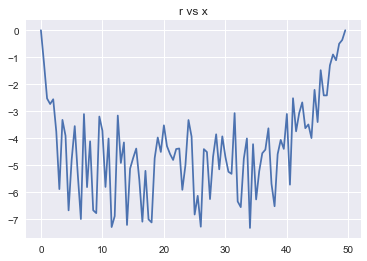

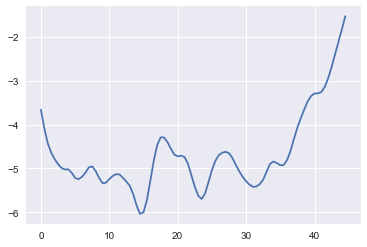

In [304]:
dic["delay"] = 11
dic["tau_d"] = round(dic["delay"]/dic["dt"])
dic["beta"] = 0.5

print (dic["tau_d"])
u, w, r, h, t, x = run_sim_(dic, coupling= True, noise = True,plot = False, plot_r = True, plot_mollifier=False)
r = smooth(r)[10:-10]
plt.show()
plt.plot([j*dic["dx"] for j in range(len(r))], r)

In [21]:
dic["tau_d"]

7

In [306]:
dic["beta"],  statistics

(0.5, (array([1., 3., 4., 5., 6., 7., 8.]), array([2, 2, 2, 1, 2, 2, 1])))

In [285]:
0.01 (array([6., 7.]), array([7, 5]))
0.02 (array([6., 7.]), array([7, 5]))
0.03, (array([6., 7.]), array([6, 6]))
0.04, (array([6., 7.]), array([5, 5]))
0.05, (array([6., 7.]), array([5, 5]))
0.06, (array([6., 7.]), array([5, 5]))
0.07, (array([6., 7.]), array([5, 5]))
0.08, (array([6., 7.]), array([5, 5]))

0.1 -(array([7., 8., 9.]), array([2, 5, 1]))
0.2, (array([7.]), array([10]))
0.3, (array([7., 8., 9.]), array([3, 3, 2]))
0.4, (array([ 8.,  9., 12., 13.]), array([1, 2, 1, 2]))
0.5, (array([3., 4., 5., 6., 7.]), array([2, 4, 4, 1, 1]))


NameError: name 'array' is not defined

#### Things to do 

* Get statistics on the somite size and distribution as noise is added 
* See if coupling reduces variance 


In [6]:
noise  = np.linspace(0, 1, 500)
beta  = np.linspace(0, 0.5, 500)
cell_loc = 30

In [ ]:
"""noise  = np.linspace(0, 1, 100)
realizations = 30
u_list_ = []
w_list_ = []
r_list_ = []
for i, n in enumerate(noise):
    u_realizations = []
    w_realizations = []
    r_realizations = []
    for j in range(realizations):
        dic["sigma_1"] = n
        dic["sigma_2"] = n
        u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = True, plot = False, plot_r = False, plot_mollifier=False)
        u_realizations.append(u)
        w_realizations.append(w)
        r_realizations.append(r)
    u_list_.append(u_realizations)
    w_list_.append(w_realizations)
    r_list_.append(r_realizations)

pickle.dump([u_list_, w_list_, r_list_], open("data_realizations.pkl", "wb"))"""

In [7]:
"""u_l, w_l, r_l = pickle.load(open("data_uncoupled_noisy.pkl", "rb"))"""

#### Wavelet analysis, alternative to qfactor analysis, suitable for finite time series signals 

Null Hypothesis : The wavelet power spectrum is indistinguishable from the power spectrum of a GWN process
Alternate Hypothesis : The wavelet power spectrum is not indistinguishable from the power spectrum of a GWN process

if pvalue is < 0.1 we fail to reject the null hypothesis otherwise we accept the null hypothesis 

The wavelet power spectrum is distributed as chi-squared distribution with two dof.

In [95]:
pval = []
for wr in w_list_:
    pval_ = []
    for wrr in wr:
        pval_.append(compute_signif_tc(wrr[cell_loc]))   
    pval.append(pval_)
    

'plt.figure(figsize=(24, 12))\nplt.plot(noise, get_pval_list(w_l, cell_loc), c = "k")\nplt.plot(noise, [0.1 for i in range(len(noise))])'

From the above plot we see that at noise level $\sigma^2=$ 0.75, the pvalue goes above 0.1 hence we cant reject the null hypothesis that the wavelet power spectrum is indistinguishable from a GWN 

In [96]:
avg_p = []
for pp in pval:
    avg_p.append(np.mean(pp))

Text(0.5, 0, 'Noise')

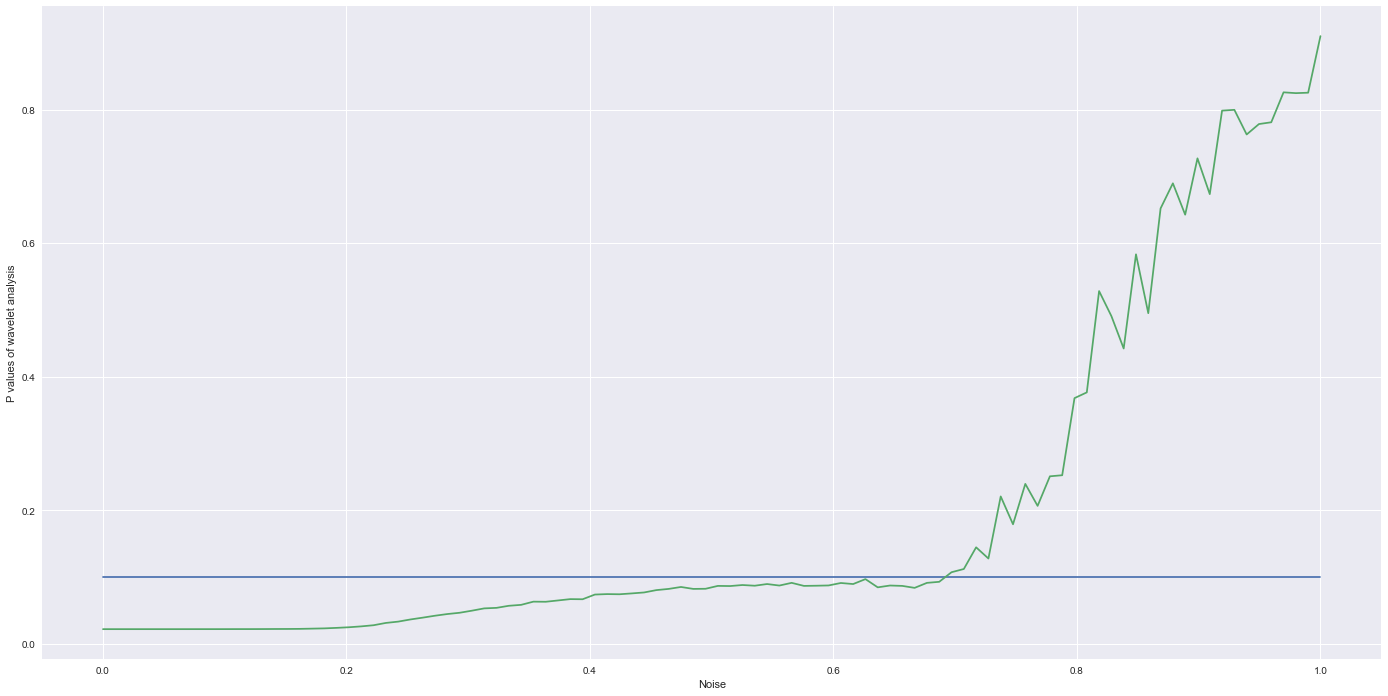

In [355]:
plt.figure(figsize=(24, 12))
plt.plot(noise, [0.1 for i in range(len(noise))])
plt.plot(noise, avg_p)
plt.ylabel("P values of wavelet analysis")
plt.xlabel("Noise")

#### Interpeak distance for w as the noise is increased 

In [223]:
in_p_d = []
av_d = []
for w_l in w_list_:
    avg_d = []
    for wi in w_l:
        dist = get_interpeak_distance( wi[cell_loc],t)
        avg_dist = np.average(dist[:-1])
        avg_d.append(avg_dist)
    av_d.append(np.average(avg_d))

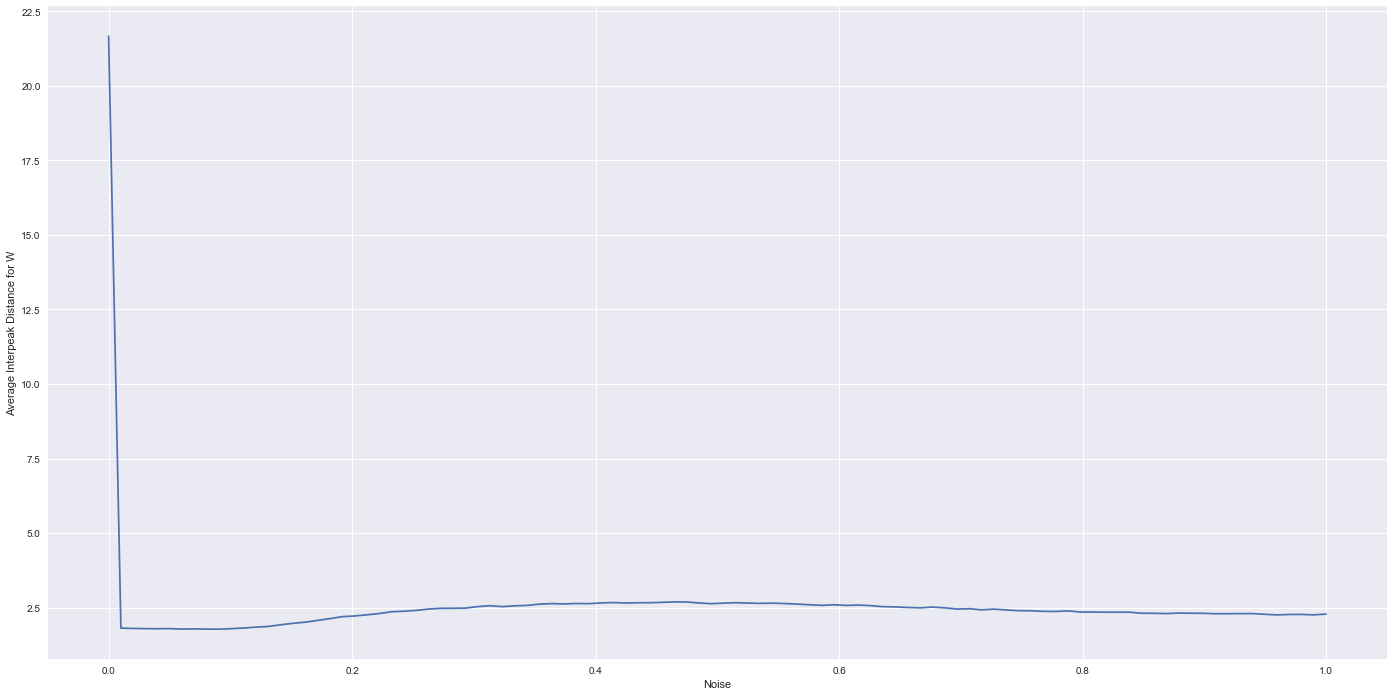

In [225]:
plt.figure(figsize=(24, 12))
plt.xlabel("Noise")
plt.ylabel("Average Interpeak Distance for W")
plt.plot(noise,av_d)

#### Somite size distribution with noise 

In [204]:
stat_list = []
peaks_list = []
dist_list = []
mu_ = []
std_ = []
for i, ri in enumerate(r_list_):
        stat_realizations = []
        peaks_realizations = []
        dist_realizations = []
        for j, rr in enumerate(ri):
            try:
                statistics, peaks, dist = extract_somite_statistics_from_readout(smooth(rr)[10:-10], dic["dx"])
                stat_realizations.append(statistics)
                peaks_realizations.append(peaks)
                dist_realizations.append(dist)
                """
                check dist_realizations is normally distributed
                results show that it is 
                normalTest(dist_realizations)
                """               
            except:
                pass 
        dr = []
        for dd in dist_realizations:
            dr.append(list(dd))
        d_flat = np.asarray([item for sublist in dr for item in sublist])
        mu, std = norm.fit(d_flat)
        mu_.append(mu)
        std_.append(std)

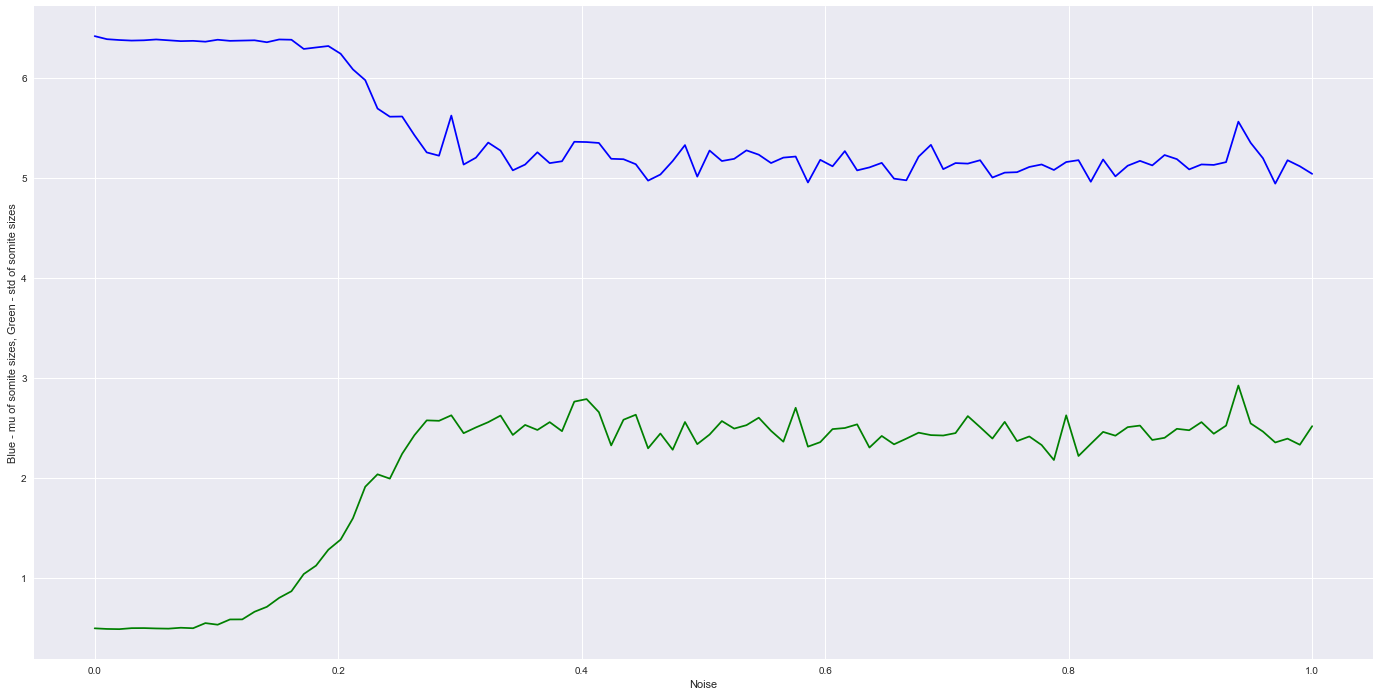

In [354]:

plt.figure(figsize=(24, 12))
    
plt.xlabel("Noise")
plt.ylabel("Blue - mu of somite sizes, Green - std of somite sizes")

plt.plot(noise, mu_, c ="b")

plt.plot(noise, std_,c = "g")

    

Without noise the somite size is between 6 to 7 cells and with noise it reduces in size when we add noise to the simulations 

* Delay in feedback - effect on somite size and collective period of the segmentation clock  
* coupling strength - effect on somite size and collective period of the segmentation clock  
* Can the noisy system be stabilized by delay in feedback or coupling 


Effect of delay in feedback on the average somite size 

In [309]:
dlay = [ i*2 for i in range (3, 20)]
dd = []
for d in  dlay:
    dic["delay"] = d
    dic["tau_d"] = round(dic["delay"]/dic["dt"])
    u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = False, plot = False, plot_r = False, plot_mollifier=False)
    r = smooth(r)[10:-10]
    statistics, peaks, dist = extract_somite_statistics_from_readout(r, dic["dx"])
    dd.append(dist)

In [311]:
avg_d = []
for d in dd:
    avg_d.append(np.average(d))

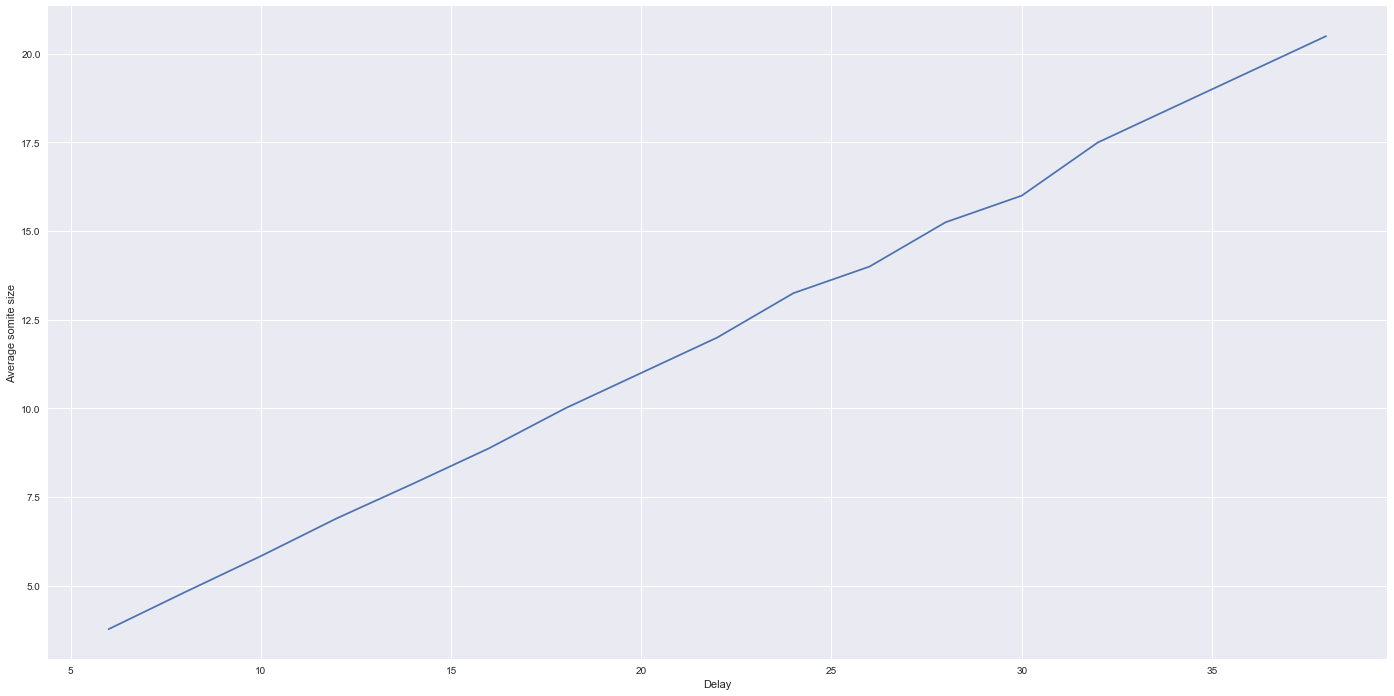

In [487]:
plt.figure(figsize=(24, 12))
plt.ylabel("Average somite size")
plt.xlabel("Delay")
plt.plot(dlay, avg_d)


We see that delay in feedback increases the somite size while in case of noise somite size goes down so it makes sense to explore if increase in delay in feedback in noisy systems can save somite size  

I observe that increase in delay in feedback along with increase in coupling strength can partly save somite size 

In [314]:
dic["sigma_1"] = 0.4 ## std deviation of the white noise added
dic["sigma_2"] = 0.4 ## std deviation of the white noise added

In [321]:
c_s = [0.02*i for i in range (3, 20)]

In [328]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        

In [324]:
dlay = [ i*2 for i in range (3, 20)]
dd_n = []
for d in  dlay:
    for c in c_s:
        dic["beta"] = c
        dic["delay"] = d
        dic["tau_d"] = round(dic["delay"]/dic["dt"])
        u, w, r, h, t, x = run_sim_(dic, coupling= True, noise = True, plot = False, plot_r = False, plot_mollifier=False)
        r = smooth(r)[10:-10]
        statistics, peaks, dist = extract_somite_statistics_from_readout(r, dic["dx"])
        dd_n.append(dist)

In [342]:
dd_nn = list(chunks(dd_n, 17))
avg_dn = []
for d in dd_nn:
    avgd = []
    for ddi in d:
        avgd.append(np.average(ddi))
    avg_dn.append(avgd)

#### Average somite size vs coupling strength for different values of the delay in feedback

Delay = 6


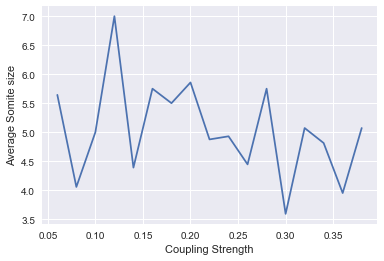

Delay = 8


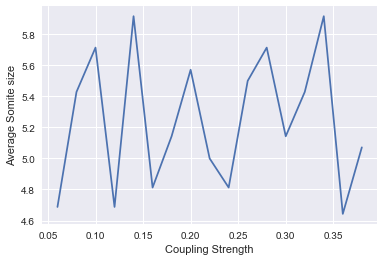

Delay = 10


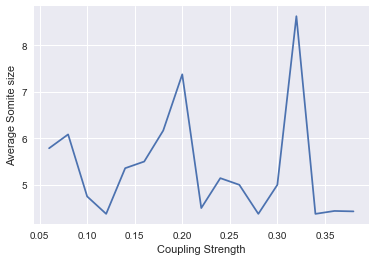

Delay = 12


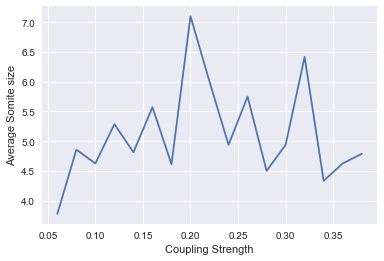

Delay = 14


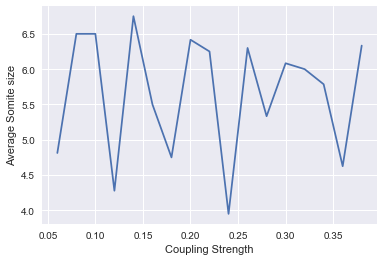

Delay = 16


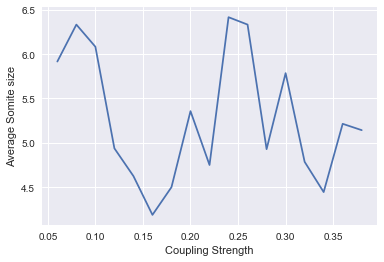

Delay = 18


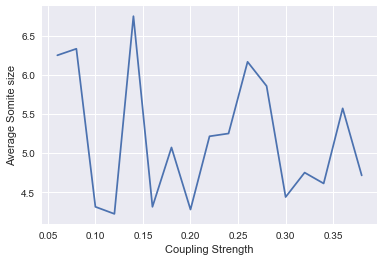

Delay = 20


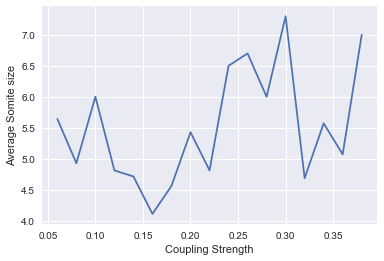

Delay = 22


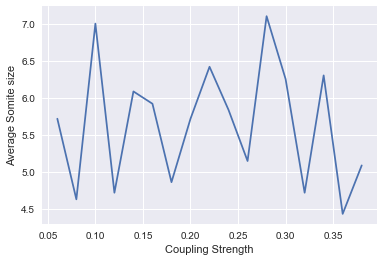

Delay = 24


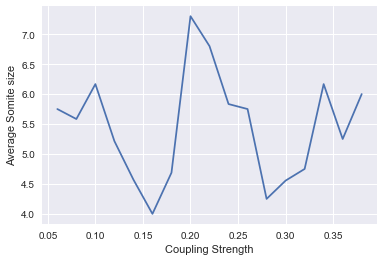

Delay = 26


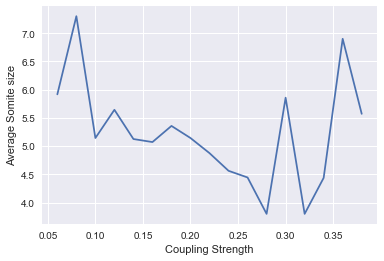

Delay = 28


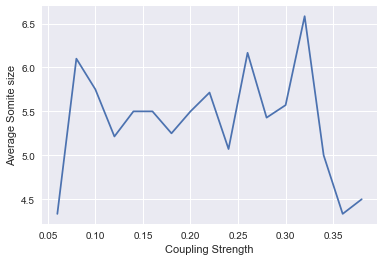

Delay = 30


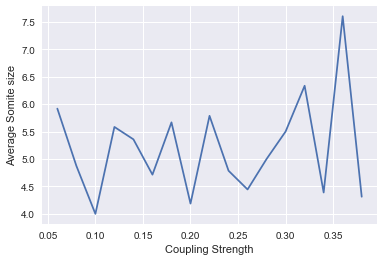

Delay = 32


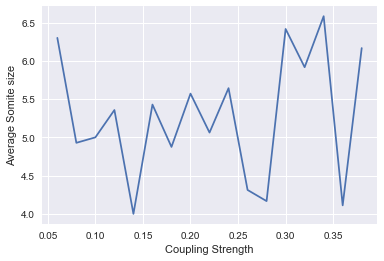

Delay = 34


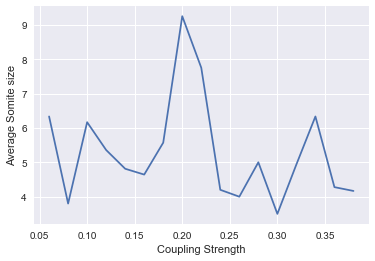

Delay = 36


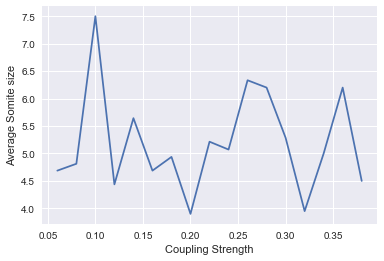

Delay = 38


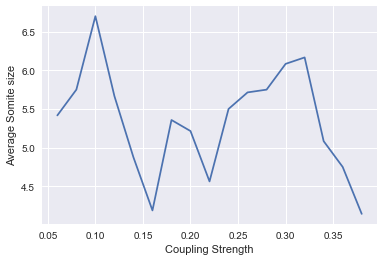

In [352]:
for i, d in  enumerate(dlay):
    print (f"Delay = {d}")
    plt.xlabel("Coupling Strength")
    plt.ylabel("Average Somite size")
    plt.plot(c_s, avg_dn[i])
    plt.show()

In [356]:
no = np.linspace(0.1, 0.6, 17)
dlay = [ i*2 for i in range (3, 20)]


In [360]:
r_ln = []
d_ln = []
for i, d in  enumerate(dlay):
    d_n = []
    tik = time.time()
    print (f"Started for delay : {d}")
    for j, n in enumerate(no):
        dic["delay"] = d
        dic["sigma_1"] = n
        dic["sigma_2"] = n
        dic["tau_d"] = round(dic["delay"]/dic["dt"])
        u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = True, plot = False, plot_r = False, plot_mollifier=False)
        r = smooth(r)[10:-10]
        r_ln.append(r)
        statistics, peaks, dist = extract_somite_statistics_from_readout(r, dic["dx"])
        d_n.append(dist)
    tok = time.time()
    print (tok-tik,f"Finished for delay: {d}")
    d_ln.append(d_n)

Started for delay : 6
75.35703134536743 Finished for delay: 6
Started for delay : 8
72.9974422454834 Finished for delay: 8
Started for delay : 10
74.2862331867218 Finished for delay: 10
Started for delay : 12
74.49254608154297 Finished for delay: 12
Started for delay : 14
73.48559093475342 Finished for delay: 14
Started for delay : 16
75.89847898483276 Finished for delay: 16
Started for delay : 18
76.23523592948914 Finished for delay: 18
Started for delay : 20
72.69991207122803 Finished for delay: 20
Started for delay : 22
73.70411205291748 Finished for delay: 22
Started for delay : 24
73.29498195648193 Finished for delay: 24
Started for delay : 26
74.76221108436584 Finished for delay: 26
Started for delay : 28
74.70876407623291 Finished for delay: 28
Started for delay : 30
72.78475284576416 Finished for delay: 30
Started for delay : 32
73.26231813430786 Finished for delay: 32
Started for delay : 34
74.2381796836853 Finished for delay: 34
Started for delay : 36
72.94764423370361 Finish

In [365]:
def normalTest(data):
    k2, p = stats.normaltest(data)
    alpha = 1e-3
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(i, "The null hypothesis can be rejected => x does not come from a normal distribution")
    else:
        print(i, "The null hypothesis cannot be rejected => x might come from a normal distribution")

In [372]:
##Check that the samples are distributed normally through the normalTest only do this for no of samples greater than 8

av_mu = []
av_std = []
for i, ddd in enumerate(d_ln):
    avg_d_mu = []
    avg_d_std = []
    for d1 in ddd:
        mu, std = norm.fit(d1)
        avg_d_mu.append(mu)
        avg_d_std.append(std)
    av_mu.append(avg_d_mu)
    av_std.append(avg_d_std)

We see that increasing the feedback delay of w may help us prevent somite sizes from reducing at higher noise level

6


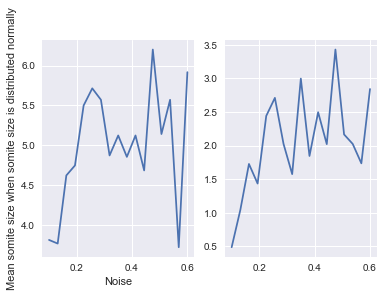

8


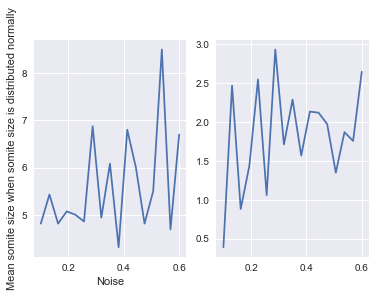

10


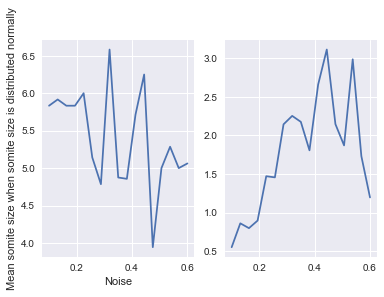

12


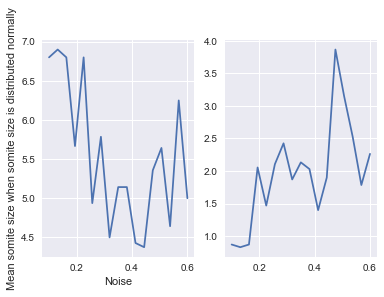

14


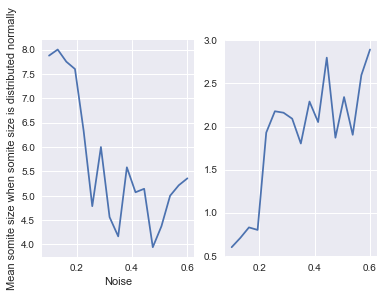

16


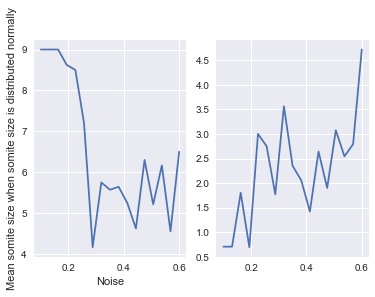

18


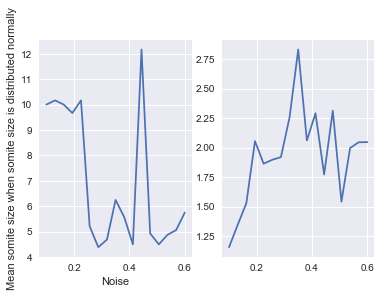

20


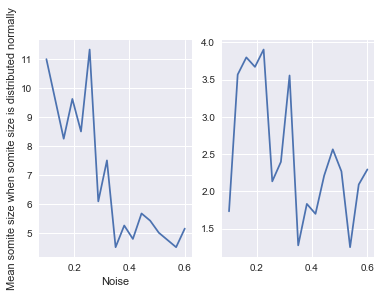

22


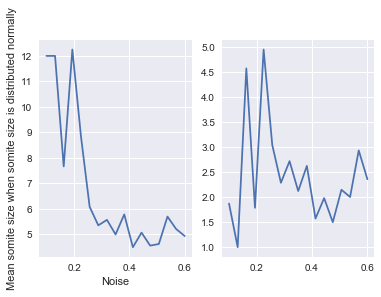

24


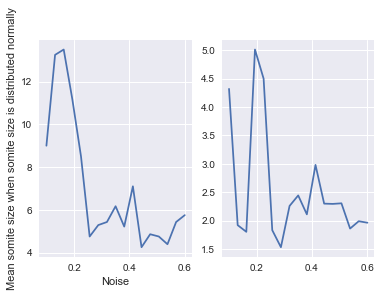

26


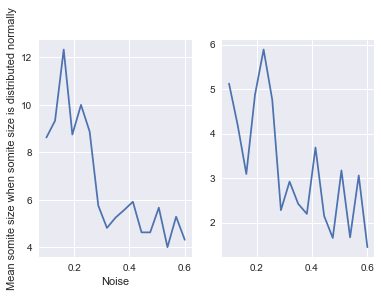

28


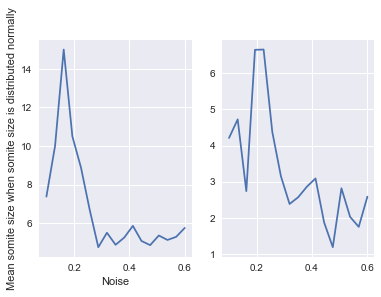

30


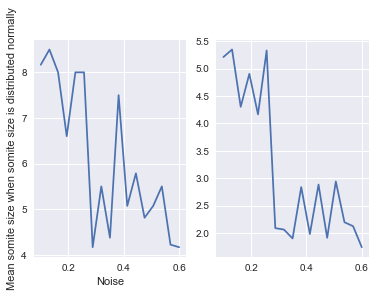

32


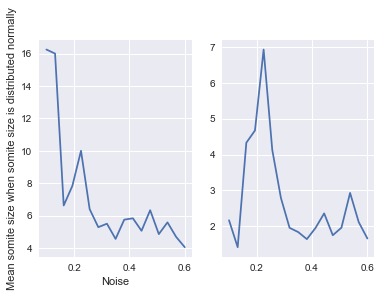

34


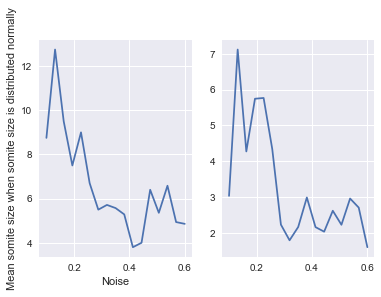

36


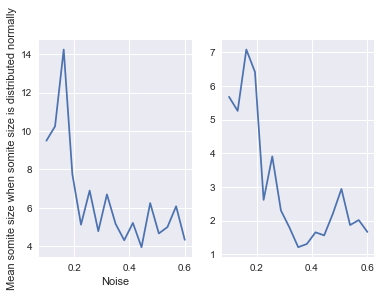

38


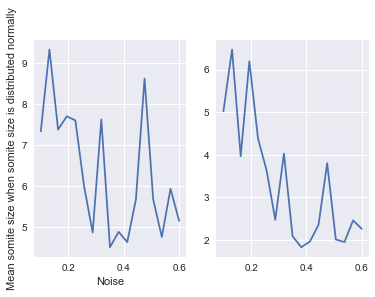

In [380]:
for i, d in enumerate(dlay):
    print (d)
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(no, av_mu[i])
    ax[1].plot(no, av_std[i])
    ax[0].set_ylabel("Mean somite size when somite size is distributed normally")
    ax[0].set_xlabel("Noise")
    
    plt.show()

In [476]:
delayy = 28
noise_add = 0.6
dic["delay"] = delayy
dic["sigma_1"] = noise_add
dic["sigma_2"] = noise_add
dic["tau_d"] = round(dic["delay"]/dic["dt"])
r_late = []
d_late = []
for nr in range(50):
    u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = True, plot = False, plot_r = False, plot_mollifier=False)
    r_late.append(r)
    r = smooth(r)[10:-10]
    statistics, peaks, dist = extract_somite_statistics_from_readout(r, dic["dx"])
    d_late.append(dist)

In [478]:
d_late_flat = [item for sublist in d_late for item in sublist]


In [479]:
compute_viable_somites(d_late_flat)

25.56179775280899

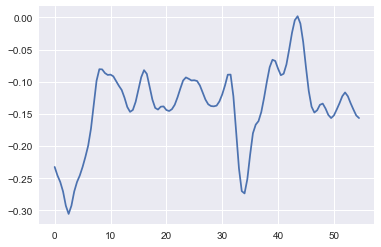

In [485]:
plt.plot([j*dic["dx"] for j in range(len(smooth(r_late[2])))], smooth(r_late[2]))

In [486]:
plot_scaleogram(w[30])

NameError: name 'pywt' is not defined

In [407]:
reg_delayy = 14
noise_add = 0.6
dic["delay"] = reg_delayy
dic["sigma_1"] = noise_add
dic["sigma_2"] = noise_add
dic["tau_d"] = round(dic["delay"]/dic["dt"])

In [408]:
d_reg = []
for nr in range(50):
    u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = True, plot = False, plot_r = False, plot_mollifier=False)
    r = smooth(r)[10:-10]
    r_ln.append(r)
    statistics, peaks, dist = extract_somite_statistics_from_readout(r, dic["dx"])
    d_reg.append(dist)

In [409]:
d_reg_flat = [item for sublist in d_reg for item in sublist]

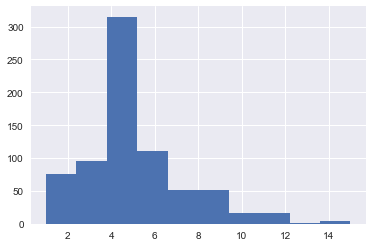

In [413]:
hist_val_reg = plt.hist(d_reg_flat)

In [443]:
delayy = 14
noise_add = 0.0
dic["delay"] = delayy
dic["sigma_1"] = noise_add
dic["sigma_2"] = noise_add
dic["tau_d"] = round(dic["delay"]/dic["dt"])
r_no_noise = []
d_reg_no_noise = []
for nr in range(50):
    u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = False, plot = False, plot_r = False, plot_mollifier=False)
    r_no_noise.append(r)
    statistics, peaks, dist = extract_somite_statistics_from_readout(r, dic["dx"])
    d_reg_no_noise.append(dist)




In [469]:
d_reg_no_noise_flat = [item for sublist in d_reg_no_noise for item in sublist]



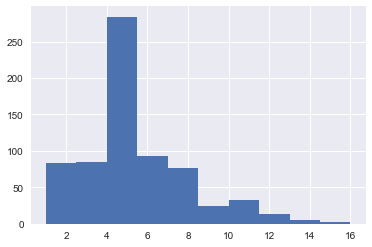

In [444]:
hist_val_reg_no_noise = plt.hist(d_reg_no_noise_flat)

In [461]:
def compute_viable_somites(d_list):
    n = 0
    for d in d_list:
        if (d >= 6 and d <= 8):
            n = n +1
    return n/len(d_list)*100

In [470]:
compute_viable_somites(d_reg_no_noise_flat)

90.0

In [471]:
compute_viable_somites(d_reg_flat)

25.543478260869566

In [472]:
compute_viable_somites(d_late_flat)

24.142857142857142

In [452]:
for r in r_no_noise:
    print(extract_somite_statistics_from_readout(r, dic["dx"])[2])

[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
[4. 8. 8

In [17]:
noise_u  = np.linspace(0, 1, 50)
noise_w  = np.linspace(0, 1, 50)

In [18]:
noise_pairs = []
np_index = []
for i, nu in enumerate(noise_u):

    for j, nw in enumerate(noise_w):
        noise_pairs.append((nu, nw))
        np_index.append((i, j))

In [19]:
len(noise_pairs)

2500

In [9]:

realizations = 30
u_list_ = []
w_list_ = []
r_list_ = []
for i, n in enumerate(noise_pairs):
    u_realizations = []
    w_realizations = []
    r_realizations = []
    for j in range(realizations):
        dic["delay"] = 14
        dic["sigma_1"] = n[0]
        dic["sigma_2"] = n[1]
        dic["tau_d"] = round(dic["delay"]/dic["dt"])
        u, w, r, h, t, x = run_sim_(dic, coupling= False, noise = True, plot = False, plot_r = False, plot_mollifier=False)
        u_realizations.append(u)
        w_realizations.append(w)
        r_realizations.append(r)
    
    u_list_.append(u_realizations)
    w_list_.append(w_realizations)
    r_list_.append(r_realizations)
    if (i%10 == 0):
        pickle.dump([u_list_, w_list_, r_list_], open(f"data_realizations_noise_pairs_{i}.pkl", "wb"))
        u_list_, w_list_, r_list_ = [], [], []

In [6]:
root = "/Users/ranjak/Downloads/"

In [7]:
f = os.listdir(root)
files = [fi for fi in f if "data_realizations_noise_pairs" in fi]

In [8]:
len(files)

250

In [11]:
def normalTest(data):
    k2, p = stats.normaltest(data)
    alpha = 1e-3
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(p, "The null hypothesis can be rejected => x does not come from a normal distribution")
    else:
        print(p, "The null hypothesis cannot be rejected => x might come from a normal distribution")

In [12]:
file_index = []

for fi in files:
    try:
        file_index.append(int(fi.split("_")[-1][:-4]) )
    except:
        print (fi)

In [13]:
file_index = sorted(file_index)

In [14]:
for fi in file_index:
    file_name = root + "data_realizations_noise_pairs_"+str(fi)+".pkl"
    u_list, w_list, r_list = pickle.load(open(file_name, "rb"))
    del u_list
    del w_list
    break

In [15]:
def return_flattened_somite_stats_multiple_noises(r_list, np_indices):
    """
    no of realizations is 30 for each r_r for 10 noise levels in r_list
    
    """
    somites_noise = []
    for i, (r_lis, np_index) in enumerate(zip(r_list, np_indices)):
        flattened_somite_stat = return_flattened_somite_stats_(r_lis)
        somites_noise.append((flattened_somite_stat, np_index))
    return somites_noise



def return_flattened_somite_stats_(r_list):
    """
    no of realizations is 30 for each r_list
    
    """
    som_stat = []
    for r in (r_list):
        
        somite_stat = extract_somite_statistics_from_readout(r, dic["dx"])[2]
        som_stat.append((somite_stat))
    return som_stat

In [20]:
somites_noise_list = []
np_indices = []
for i, j in enumerate(np_index):
    np_indices.append(j)
    tik = time.time()
    if (i%10 == 0):
        
        print (i, "Started")
        u_list, w_list, r_list = pickle.load(open(f"data_realizations_noise_pairs_{i}.pkl", "rb"))
        del u_list
        del w_list
        if (len(r_list) == 1):
            somites_noise_list.append( ((return_flattened_somite_stats_(r_list[0])), (0, 0)) )
            np_indices = []
        else:
            somites_noise_list.append(return_flattened_somite_stats_multiple_noises(r_list, np_indices))
            np_indices = []
    if (i % 10 == 0):
        
        print ("Finished", time.time()-tik)

0 Started
Finished 0.23089885711669922
10 Started
Finished 22.443896055221558
20 Started
Finished 5.41936731338501
30 Started
Finished 2.666149854660034
40 Started
Finished 2.5975430011749268
50 Started
Finished 2.665977954864502
60 Started
Finished 17.200721979141235
70 Started
Finished 22.807801961898804
80 Started
Finished 25.501635789871216
90 Started
Finished 26.660748958587646
100 Started
Finished 24.9008629322052
110 Started
Finished 23.756641149520874
120 Started
Finished 27.064918994903564
130 Started
Finished 25.430965900421143
140 Started
Finished 23.681654930114746
150 Started
Finished 22.615568161010742
160 Started
Finished 24.68939995765686
170 Started
Finished 23.06681203842163
180 Started
Finished 25.90124011039734
190 Started
Finished 27.386192798614502
200 Started
Finished 25.990020990371704
210 Started
Finished 24.679821014404297
220 Started
Finished 28.82880401611328
230 Started
Finished 23.53794503211975
240 Started
Finished 27.407695770263672
250 Started
Finished 

KeyboardInterrupt: 

In [222]:
#pickle.dump(somites_noise_list, open("somites_noise_list.pkl", "wb"))

In [237]:
def extract_flattened_list(stats):
    lis = []
    for aa in stats[0]:
        lis.append(list(aa))
    lis_f = [item for sublist in lis for item in sublist]


    
    return lis_f


def extract_mean_noise(stats):
    lis = []
    for aa in stats[0]:
        lis.append(list(aa))
    lis_f = [item for sublist in lis for item in sublist]


    mu = np.mean(lis_f)
    np_index  = stats[1]
    return mu, np_index

In [164]:
mean_noise = []
for ss in somites_noise_list:
    if (len(ss) == 2):
        mean_noise.append(extract_mean_noise(ss))
    else:
        for si in ss:
            mean_noise.append(extract_mean_noise(si))


In [166]:
#pickle.dump(mean_noise, open("mean_noise_somites.pkl", "wb"))

In [189]:
x = []
y = []
z = []
final_z = []
for m1, (t1, t2) in mean_noise:
    z.append(m1)
    x.append(t1)
    y.append(t2)
    if t2 == 49:
        final_z.append(z)
        z = []
        print (t1)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [190]:
final_z = np.asarray(final_z)

In [221]:
"""noise_w = np.around(noise_w, decimals=1)

noise_u = np.around(noise_u, decimals=1)
plt.figure(figsize=(24, 12))
plt.xticks(list(range(50)),noise_w)
plt.yticks(list(range(50)), noise_u)
plt.xlabel("Noise in w")
plt.ylabel("Noise in u")
plt.title("Heatmap of average somite size vs noise in u and w")
im = plt.imshow(final_z, cmap="viridis")
plt.colorbar(im)
plt.savefig("colormap.png")"""

'noise_w = np.around(noise_w, decimals=1)\n\nnoise_u = np.around(noise_u, decimals=1)\nplt.figure(figsize=(24, 12))\nplt.xticks(list(range(50)),noise_w)\nplt.yticks(list(range(50)), noise_u)\nplt.xlabel("Noise in w")\nplt.ylabel("Noise in u")\nplt.title("Heatmap of average somite size vs noise in u and w")\nim = plt.imshow(final_z, cmap="viridis")\nplt.colorbar(im)\nplt.savefig("colormap.png")'

In [238]:
somites_r = []
for ss in somites_noise_list:
    if (len(ss) == 2):
        somites_r.append(extract_flattened_list(ss))
    else:
        for si in ss:
            somites_r.append(extract_flattened_list(si))


In [248]:
%matplotlib inline

In [250]:
fit_data = []
for i in range(0, len(somites_r), 100):
    fit_data.append(somites_r[i])

In [274]:
dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 

len(dist_names)

82

In [269]:
def calculate_best_fit(data):
    
    dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 


    sse_best = 100000000
    best_param = None
    best_dist = None
    
    y, x = np.histogram(data, bins="auto", density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    for dist_name in dist_names:

        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(fit_data[0])
        arg = param[:-2]
        loc = param[-2]
        scale = param[-1]

        # Calculate fitted PDF and error with fit in distribution
        pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))
        if (sse < sse_best):
            sse_best = sse
            best_param = param
            best_dist = dist_name

    return best_dist, best_param, sse_best

In [273]:
for i, data in enumerate(fit_data):
    print (i)
    print (calculate_best_fit(data))

0
alpha 4.1328736962349435
anglit 5.124999999999992
arcsine 3.8327009491155883
beta 5.124999999949755
betaprime 4.132418688010513
bradford 4.500112399891501
burr 1.580404652553222
cauchy 5.124999999999992
chi 4.081137755789215
chi2 4.938865712631753
cosine 5.124999999999992
dgamma 3.2413244793063978
dweibull 3.582382382223732
erlang 4.178255921355143
expon 4.867576266564996
exponweib 5.2135012935634135
exponpow 5.1963152135658195
f 4.050571373676512
fatiguelife 4.046166252801189
fisk 2.9768414620685575
foldcauchy 2.988087758549339
foldnorm 4.046911300947413
frechet_r 5.2263000090261
frechet_l 3.603244716391397
genlogistic 1.142994952956991


/anaconda3/envs/rem/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  from ipykernel import kernelapp as app
/anaconda3/envs/rem/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.

genpareto 3.228604292326448
genexpon 4.642078492980702
genextreme 1.2542192521554774
gausshyper 3.0710734769464034
gamma 4.924384643081296
gengamma 5.183629896294122
genhalflogistic 3.483794361182299
gilbrat 4.852431011860169
gompertz 2.283485271661689
gumbel_r 4.523038810876331
gumbel_l 2.2828068219727418
halfcauchy 4.849562421357576
halflogistic 4.787698550343775
halfnorm 4.768182751524082
hypsecant 2.508733182807783
invgamma 4.137799584882303
invgauss 4.229673543954708
invweibull 4.52308734473323
johnsonsb 4.512688080372175
johnsonsu 5.118259046318596
ksone nan
kstwobign 4.611629338889795
laplace 2.377961449641969
logistic 2.976588420390759
loggamma 0.9604148014065839
loglaplace 2.813809633761905
lognorm 4.047607408882706
lomax 4.866576894285304
maxwell 4.498359308322898
mielke 1.1472582818596502
nakagami 5.164377740818066
ncx2 5.079704105931198
ncf 4.354351671873531
nct 4.0963868429398795
norm 4.047938201989633
pareto 4.989180714963251
pearson3 5.124999999999992
powerlaw 4.45494483

truncnorm 13.938833408090902
tukeylambda 13.938833408090902
uniform 15.240018048613779
vonmises 2629886782230.8867
wald 14.343327292838115
weibull_min 15.201788404934621
weibull_max 14.415993039523288
wrapcauchy nan
('beta', (1.8272360329085048e-11, 2.1317751721207875e-12, 3.9999999999826974, 4.0000000000173035), 13.938833408089629)
4
alpha 16.293053012540195
anglit 15.42574091056669
arcsine 16.909005822484946
beta 15.42574091055738
betaprime 16.30131084993094
bradford 16.712714250780405
burr nan
cauchy 15.42574091056669
chi 16.34289567817851
chi2 16.12650211204998
cosine 15.42574091056669
dgamma 16.503450364618313
dweibull 16.049728569706947
erlang 16.232449683469863
expon 16.008360050240057
exponweib 17.03971552464486
exponpow 17.206417896272875
f 16.352872047303624
fatiguelife 16.359484096620754
fisk 16.871832767140745
foldcauchy 19.347309178824283
foldnorm 16.352779799387182
frechet_r 17.118776895125887
frechet_l 16.181556567765107
genlogistic 21.576368973627446
genpareto 16.370355

johnsonsb 18.156267843683104
johnsonsu 18.327688657178747
ksone nan
kstwobign 18.529353280909227
laplace 18.327560947477185
logistic 18.327684669084356
loggamma 18.32760413580872
loglaplace 18.327742110530636
lognorm 18.36597736348532
lomax 18.857597328090296
maxwell 18.500654988434004
mielke 18.327652924504875
nakagami 19.61089954217642
ncx2 19.39323571768179
ncf 18.433357407469114
nct 18.37136063241933
norm 18.365767764447035
pareto 19.031496759327435
pearson3 18.327688888888883
powerlaw 19.005087757687555
powerlognorm 18.33102894383879
powernorm 18.328272602851822
rdist 20.14419179938104
reciprocal 18.327688888888883
rayleigh 18.566740482154625
rice 18.36576200609597
recipinvgauss 18.377707308534166
semicircular 18.327688888888883
t 18.327688888888883
triang 18.61543380322769
truncexpon 19.240554360554054
truncnorm 18.327688888888883
tukeylambda 18.327688888888883
uniform 19.066022222222216
vonmises 1714214218770.8782
wald 18.670310110929442
weibull_min 19.688686557354348
weibull_ma

dweibull 17.384017156762038
erlang 17.51751858540497
expon 17.99617355974043
exponweib 18.78699439294649
exponpow 18.565802021232187
f 17.49909286334651
fatiguelife 17.498429981886755
fisk 17.459136627907498
foldcauchy 17.4488406153223
foldnorm 17.499918419826088
frechet_r 18.8175604166304
frechet_l 17.332279994801315
genlogistic 17.459164818443973
genpareto 17.064640596765127
genexpon 17.725647450514412
genextreme 17.45782312344012
gausshyper 17.477942422197817
gamma 18.13532614550967
gengamma 18.68875444535205
genhalflogistic 17.746105151237263
gilbrat 17.79209424668218
gompertz 17.45907172089847
gumbel_r 17.589643171945756
gumbel_l 17.459056237149877
halfcauchy 17.76709597690101
halflogistic 17.90588085519957
halfnorm 17.933035563903932
hypsecant 17.458883856578723
invgamma 17.50957531864783
invgauss 17.52648993438534
invweibull 17.589834071342693
johnsonsb 17.253545096152816
johnsonsu 17.45884110128639
ksone nan
kstwobign 17.660803128827713
laplace 17.458834967230683
logistic 17.45

powerlognorm 18.045049987965584
powernorm 18.04223656830018
rdist 19.85369822538107
reciprocal 18.04154216166739
rayleigh 18.27853325142599
rice 18.079763573194285
recipinvgauss 18.09165330950987
semicircular 18.04154216166739
t 18.04154216166739
triang 18.327516647672788
truncexpon 18.947273740285382
truncnorm 18.04154216166739
tukeylambda 18.04154216166739
uniform 18.776312904025467
vonmises 1714214239817.016
wald 18.380352656697077
weibull_min 19.39888050337101
weibull_max 17.91540028896847
wrapcauchy nan
('genpareto', (-3.7125934307248176, -0.08364674768048792, 30.011293811738625), 17.648429827792622)
15
alpha 18.72758981311595
anglit 18.677953623240438
arcsine 19.251194266277256
beta 18.677953623240377
betaprime 18.73147388758824
bradford 19.410490376760443
burr nan
cauchy 18.677953623240438
chi 18.723731161018094
chi2 19.37557122098716
cosine 18.677953623240438
dgamma 18.67533976543712
dweibull 18.604753611622847
erlang 18.737833360989285
expon 19.21982001499452
exponweib 20.0105

gausshyper 18.235777074881796
gamma 18.734652773260237
gengamma 19.58257414006959
genhalflogistic 18.331421881909645
gilbrat 18.388867943467982
gompertz 18.235047578920668
gumbel_r 18.243590415335724
gumbel_l 18.235033911221333
halfcauchy 18.406477777730686
halflogistic 18.471837358515927
halfnorm 18.483073834861425
hypsecant 18.235071165830266
invgamma 18.234523233094723
invgauss 18.235195401369047
invweibull 18.24358866381517
johnsonsb 18.038154048715995
johnsonsu 18.235139504909032
ksone nan
kstwobign 18.26272667085762
laplace 18.235091265746057
logistic 18.235021263959123
loggamma 18.235044240162665
loglaplace 18.235034690073277
lognorm 18.234242092255695
lomax 18.569082662742346
maxwell 18.25522734013904
mielke 18.23500501937366
nakagami 19.36651131501109
ncx2 19.24625459633248
ncf 18.236696802501736
nct 18.234292931845605
norm 18.234226112819588
pareto 18.763505079896216
pearson3 18.235139504869498
powerlaw 18.543837292024836
powerlognorm 18.234688711670206
powernorm 18.234920938

beta 18.46896340532327
betaprime 18.468615458349184
bradford 18.824006157289652
burr nan
cauchy 18.46896340532338
chi 18.468411806972924
chi2 19.03779451980821
cosine 18.46896340532338
dgamma 18.464733049337905
dweibull 18.387953215150564
erlang 18.4688563874051
expon 18.81108274821847
exponweib 19.88495487723677
exponpow 19.839359895220845
f 18.468321193180167
fatiguelife 18.468326063417425
fisk 18.468860296606717
foldcauchy 18.458862388938343
foldnorm 18.469546962783223
frechet_r 19.935534052368116
frechet_l 18.336259183514894
genlogistic 18.46890544680527
genpareto 18.034150972765524
genexpon 18.547008455000103
genextreme 18.467493031445752
gausshyper 18.469790248841125
gamma 18.97161000845076
gengamma 19.81917272411994
genhalflogistic 18.567276834181413
gilbrat 18.622325698330574
gompertz 18.468885311445415
gumbel_r 18.478072802032834
gumbel_l 18.468871380051006
halfcauchy 18.64261821843826
halflogistic 18.708420756593263
halfnorm 18.71973143874858
hypsecant 18.468903764569394
invg